In [2]:
import cv2

# Mouse callback function to get the coordinates
def show_coordinates(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE:
        img_copy = img.copy()
        text = f'X: {x}, Y: {y}'
        cv2.putText(img_copy, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        cv2.imshow('Image', img_copy)

# Load the image
img = cv2.imread(r"C:\Users\mohab\Desktop\testing  coo\WhatsApp Image 2024-06-20 at 14.01.32_c7abec6d.jpg")

# Create a window and set the mouse callback function
#cv2.namedWindow('Image')
cv2.setMouseCallback('Image', show_coordinates)

while True:
    cv2.imshow('Image', img)
    if cv2.waitKey(1) & 0xFF == 27:  # Press 'ESC' to exit
        break

cv2.destroyAllWindows()


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


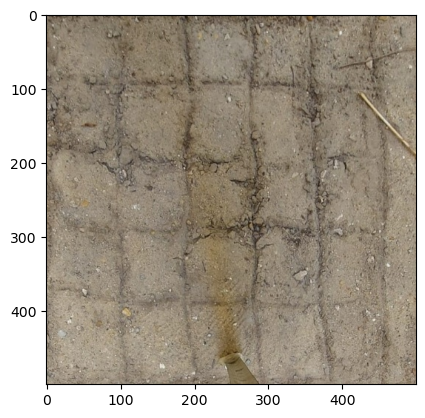

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Load the image using OpenCV
image_path ='resized_image.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Create a figure and axis
fig, ax = plt.subplots()

# Display the image
ax.imshow(img)

# Function to display pixel coordinates
def format_coord(x, y):
    # Get the shape of the image
    num_rows, num_cols, _ = img.shape
    col = int(x + 0.5)
    row = int(y + 0.5)
    
    if col >= 0 and col < num_cols and row >= 0 and row < num_rows:
        # Get the pixel value
        r, g, b = img[row, col]
        return f'x={col}, y={row}, R={r}, G={g}, B={b}'
    else:
        return 'x=NaN, y=NaN'

# Set the format for the coordinate display
ax.format_coord = format_coord

# Show the plot
plt.show()


Image resized and saved to resized_image.jpg


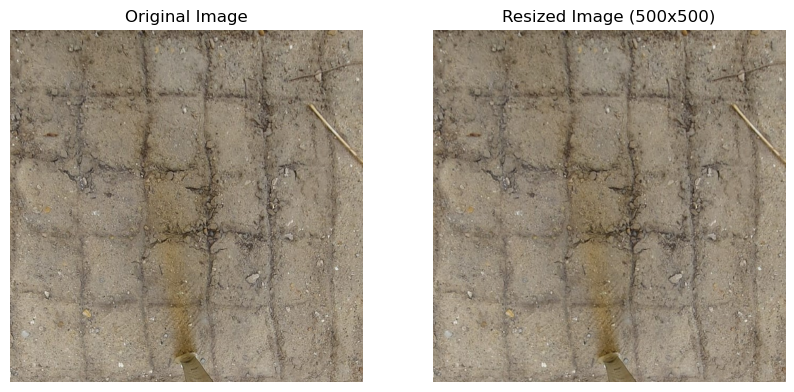

In [11]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = r"C:\Users\mohab\Desktop\testing  coo\cut.jpg"
img = cv2.imread(image_path)

# Check if the image is loaded correctly
if img is None:
    print("Error: Unable to load image.")
else:
    # Resize the image to 50x50 pixels
    resized_img = cv2.resize(img, (500, 500))

    # Save the resized image
    output_path = 'resized_image.jpg'
    cv2.imwrite(output_path, resized_img)
    
    print(f"Image resized and saved to {output_path}")

    # Convert BGR (OpenCV format) to RGB (Matplotlib format)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized_img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)

    # Display the original and resized images using Matplotlib
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(img_rgb)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Resized Image (500x500)')
    plt.imshow(resized_img_rgb)
    plt.axis('off')

    plt.show()


In [1]:
import cv2

# URL of the video stream from the mobile device
url = 'http://192.168.1.10:8080/video'

# Open the video stream
cap = cv2.VideoCapture(url)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    if not ret:
        print("Failed to capture video")
        break

    # Display the resulting frame
    cv2.imshow('Video Stream',frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close windows
cap.release()
cv2.destroyAllWindows()


In [13]:
pip uninstall opencv-python-headless -y 

Found existing installation: opencv-python-headless 4.9.0.80
Uninstalling opencv-python-headless-4.9.0.80:
  Successfully uninstalled opencv-python-headless-4.9.0.80
Note: you may need to restart the kernel to use updated packages.


You can safely remove it manually.


In [14]:
pip install opencv-python --upgrade

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 1.1 MB/s eta 0:00:36
   ---------------------------------------- 0.1/38.8 MB 1.2 MB/s eta 0:00:32
   ---------------------------------------- 0.2/38.8 MB 1.4 MB/s eta 0:00:29
   ---------------------------------------- 0.3/38.8 MB 1.5 MB/s eta 0:00:27
   ---------------------------------------- 0.4/38.8 MB 1.6 MB/s eta 0:00:25
    --------------------------------------- 0.5/38.8 MB 1.7 MB/s eta 0:00:24
    --------------------------------------- 0.6/38.8 MB 1.7 MB/s eta 0:00:23
    --------------------------------------- 0.7/38.8 MB 1.7 MB/s eta 0:00:23
    --------------------------------------- 0.8/38.8 MB 1.7 MB/s eta 0:00:23
    --------------------------------------- 0.8/38.8 MB 1.8 MB/s eta 0:00:22
    --------------------------------------- 0.9/38.8 MB 1.8 MB/s eta 0:00:21
   - --------

In [3]:
import cv2
import threading
import time

# URL of the video stream from the mobile device
url = 'http://192.168.1.10:8080/video'

# Desired frame rate
frame_rate = 10
frame_interval = 1.0 / frame_rate  # Interval in seconds

# Global variables to store frames and capture status
cap = None
frame = None
ret = False

# Function to capture video frames
def capture_video():
    global cap, frame, ret
    while True:
        ret, frame = cap.read()

# Open the video stream
cap = cv2.VideoCapture(url)

# Start a thread to capture video frames
thread = threading.Thread(target=capture_video)
thread.daemon = True
thread.start()

# Main loop to process frames at the desired frame rate
while True:
    start_time = time.time()
    
    # Display the resulting frame
    cv2.imshow('Video Stream', frame)

    # Calculate the elapsed time
    elapsed_time = time.time() - start_time
    time_to_wait = max(0, frame_interval - elapsed_time)

    # Break the loop on 'q' key press
    if cv2.waitKey(int(time_to_wait * 1000)) & 0xFF == ord('q'):
        break

# Release the capture and close windows
cap.release()
cv2.destroyAllWindows()


Exception in thread Thread-5 (capture_video):
Traceback (most recent call last):
  File "C:\Users\mohab\anaconda3\envs\tensorflownew\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "C:\Users\mohab\anaconda3\envs\tensorflownew\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\mohab\AppData\Local\Temp\ipykernel_5808\838065049.py", line 21, in capture_video
AttributeError: 'NoneType' object has no attribute 'read'


In [1]:
import os
import cv2
import numpy as np

def detect_green_areas_in_video(input_video_path, output_video_path, min_area_fraction=0.001):
    # Open the input video
    cap = cv2.VideoCapture(input_video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return
    
    # Get video properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Define the codec and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Use appropriate codec for your needs
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))
    
    frame_index = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Convert frame to HSV
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        # Define the lower and upper bounds for green color
        lower_green = np.array([27, 30, 30])
        upper_green = np.array([90, 255, 255])

        # Create a binary mask where green regions are white
        mask = cv2.inRange(hsv, lower_green, upper_green)

        # Morphological operations to remove noise
        kernel = np.ones((3, 3), np.uint8)
        mask = cv2.erode(mask, kernel, iterations=1)
        mask = cv2.dilate(mask, kernel, iterations=1)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

        # Calculate minimum area based on frame dimensions
        min_area = min_area_fraction * frame.shape[0] * frame.shape[1]

        # Find connected components and their statistics
        num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)

        # Draw bounding boxes around detected green areas
        for i in range(1, num_labels):  # Exclude background label (0)
            if stats[i, cv2.CC_STAT_AREA] >= min_area:
                x = stats[i, cv2.CC_STAT_LEFT]
                y = stats[i, cv2.CC_STAT_TOP]
                w = stats[i, cv2.CC_STAT_WIDTH]
                h = stats[i, cv2.CC_STAT_HEIGHT]
                cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with bounding boxes to the output video
        out.write(frame)

        # Print progress
        frame_index += 1
        print(f"Processed frame {frame_index}/{frame_count}")

    # Release resources
    cap.release()
    out.release()
    print("Processing completed.")

# Example usage
input_video_path = r"C:\Users\mohab\Desktop\testing  coo\WhatsApp Video 2024-06-22 at 13.59.38_722ec385.mp4"  # Path to the input video
output_video_path = r"C:\Users\mohab\Desktop\testing  coo\ouutput.mp4"  # Path to save the output video
detect_green_areas_in_video(input_video_path, output_video_path)


Processed frame 1/1091
Processed frame 2/1091
Processed frame 3/1091
Processed frame 4/1091
Processed frame 5/1091
Processed frame 6/1091
Processed frame 7/1091
Processed frame 8/1091
Processed frame 9/1091
Processed frame 10/1091
Processed frame 11/1091
Processed frame 12/1091
Processed frame 13/1091
Processed frame 14/1091
Processed frame 15/1091
Processed frame 16/1091
Processed frame 17/1091
Processed frame 18/1091
Processed frame 19/1091
Processed frame 20/1091
Processed frame 21/1091
Processed frame 22/1091
Processed frame 23/1091
Processed frame 24/1091
Processed frame 25/1091
Processed frame 26/1091
Processed frame 27/1091
Processed frame 28/1091
Processed frame 29/1091
Processed frame 30/1091
Processed frame 31/1091
Processed frame 32/1091
Processed frame 33/1091
Processed frame 34/1091
Processed frame 35/1091
Processed frame 36/1091
Processed frame 37/1091
Processed frame 38/1091
Processed frame 39/1091
Processed frame 40/1091
Processed frame 41/1091
Processed frame 42/1091
P

In [3]:
import os
import cv2
import numpy as np

def detect_green_areas_in_video(input_video_path, output_video_path, min_area_fraction=0.001):
    # Open the input video
    cap = cv2.VideoCapture(input_video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return
    
    # Get video properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Define the codec and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Use appropriate codec for your needs
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))
    
    frame_index = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Convert frame to HSV
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        # Define the lower and upper bounds for green color
        lower_green = np.array([27, 30, 30])
        upper_green = np.array([90, 255, 255])

        # Create a binary mask where green regions are white
        mask = cv2.inRange(hsv, lower_green, upper_green)

        # Morphological operations to remove noise
        kernel = np.ones((3, 3), np.uint8)
        mask = cv2.erode(mask, kernel, iterations=1)
        mask = cv2.dilate(mask, kernel, iterations=1)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

        # Calculate minimum area based on frame dimensions
        min_area = min_area_fraction * frame.shape[0] * frame.shape[1]

        # Find connected components and their statistics
        num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)

        # Draw bounding boxes around detected green areas
        for i in range(1, num_labels):  # Exclude background label (0)
            if stats[i, cv2.CC_STAT_AREA] >= min_area:
                x = stats[i, cv2.CC_STAT_LEFT]
                y = stats[i, cv2.CC_STAT_TOP]
                w = stats[i, cv2.CC_STAT_WIDTH]
                h = stats[i, cv2.CC_STAT_HEIGHT]
                cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Display the frame with bounding boxes
        cv2.imshow('Frame', frame)
        
        # Write the frame with bounding boxes to the output video
        out.write(frame)

        # Print progress
        frame_index += 1
        print(f"Processed frame {frame_index}/{frame_count}")

        # Exit if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release resources
    cap.release()
    out.release()
    cv2.destroyAllWindows()
    print("Processing completed.")

# Example usage
input_video_path = r"C:\Users\mohab\Desktop\testing  coo\WhatsApp Video 2024-06-22 at 13.59.38_722ec385.mp4"  # Path to the input video
output_video_path = r"C:\Users\mohab\Desktop\testing  coo\ouutput.mp4"  # Path to save the output video
detect_green_areas_in_video(input_video_path, output_video_path)


Processed frame 1/1091
Processed frame 2/1091
Processed frame 3/1091
Processed frame 4/1091
Processed frame 5/1091
Processed frame 6/1091
Processed frame 7/1091
Processed frame 8/1091
Processed frame 9/1091
Processed frame 10/1091
Processed frame 11/1091
Processed frame 12/1091
Processed frame 13/1091
Processed frame 14/1091
Processed frame 15/1091
Processed frame 16/1091
Processed frame 17/1091
Processed frame 18/1091
Processed frame 19/1091
Processed frame 20/1091
Processed frame 21/1091
Processed frame 22/1091
Processed frame 23/1091
Processed frame 24/1091
Processed frame 25/1091
Processed frame 26/1091
Processed frame 27/1091
Processed frame 28/1091
Processed frame 29/1091
Processed frame 30/1091
Processed frame 31/1091
Processed frame 32/1091
Processed frame 33/1091
Processed frame 34/1091
Processed frame 35/1091
Processed frame 36/1091
Processed frame 37/1091
Processed frame 38/1091
Processed frame 39/1091
Processed frame 40/1091
Processed frame 41/1091
Processed frame 42/1091
P

In [4]:
import os
import cv2
import numpy as np
import time

def detect_green_areas_in_video(input_video_path, output_video_path, min_area_fraction=0.001):
    # Open the input video
    cap = cv2.VideoCapture(input_video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return
    
    # Get video properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_interval = 1.0 / fps  # Time interval between frames in seconds
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Define the codec and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Use appropriate codec for your needs
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))
    
    frame_index = 0
    while cap.isOpened():
        start_time = time.time()  # Start time for processing the current frame
        
        ret, frame = cap.read()
        if not ret:
            break
        
        # Convert frame to HSV
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        # Define the lower and upper bounds for green color
        lower_green = np.array([27, 30, 30])
        upper_green = np.array([90, 255, 255])

        # Create a binary mask where green regions are white
        mask = cv2.inRange(hsv, lower_green, upper_green)

        # Morphological operations to remove noise
        kernel = np.ones((3, 3), np.uint8)
        mask = cv2.erode(mask, kernel, iterations=1)
        mask = cv2.dilate(mask, kernel, iterations=1)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

        # Calculate minimum area based on frame dimensions
        min_area = min_area_fraction * frame.shape[0] * frame.shape[1]

        # Find connected components and their statistics
        num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)

        # Draw bounding boxes around detected green areas
        for i in range(1, num_labels):  # Exclude background label (0)
            if stats[i, cv2.CC_STAT_AREA] >= min_area:
                x = stats[i, cv2.CC_STAT_LEFT]
                y = stats[i, cv2.CC_STAT_TOP]
                w = stats[i, cv2.CC_STAT_WIDTH]
                h = stats[i, cv2.CC_STAT_HEIGHT]
                cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Display the frame with bounding boxes
        cv2.imshow('Frame', frame)
        
        # Write the frame with bounding boxes to the output video
        out.write(frame)

        # Calculate processing time for the frame
        processing_time = time.time() - start_time
        print(f"Frame {frame_index + 1}/{frame_count}: Processing time = {processing_time:.4f} seconds, Frame interval = {frame_interval:.4f} seconds")

        # Print whether processing is faster or slower than real-time
        if processing_time < frame_interval:
            print("Processing is faster than real-time.")
        else:
            print("Processing is slower than real-time.")

        # Exit if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

        frame_index += 1

    # Release resources
    cap.release()
    out.release()
    cv2.destroyAllWindows()
    print("Processing completed.")

# Example usage
input_video_path = r"C:\Users\mohab\Desktop\testing  coo\WhatsApp Video 2024-06-22 at 13.59.38_722ec385.mp4"  # Path to the input video
output_video_path = r"C:\Users\mohab\Desktop\testing  coo\ouutput.mp4"  # Path to save the output video
detect_green_areas_in_video(input_video_path, output_video_path)


Frame 1/1091: Processing time = 0.0411 seconds, Frame interval = 0.0334 seconds
Processing is slower than real-time.
Frame 2/1091: Processing time = 0.0230 seconds, Frame interval = 0.0334 seconds
Processing is faster than real-time.
Frame 3/1091: Processing time = 0.0240 seconds, Frame interval = 0.0334 seconds
Processing is faster than real-time.
Frame 4/1091: Processing time = 0.0230 seconds, Frame interval = 0.0334 seconds
Processing is faster than real-time.
Frame 5/1091: Processing time = 0.0240 seconds, Frame interval = 0.0334 seconds
Processing is faster than real-time.
Frame 6/1091: Processing time = 0.0220 seconds, Frame interval = 0.0334 seconds
Processing is faster than real-time.
Frame 7/1091: Processing time = 0.0240 seconds, Frame interval = 0.0334 seconds
Processing is faster than real-time.
Frame 8/1091: Processing time = 0.0220 seconds, Frame interval = 0.0334 seconds
Processing is faster than real-time.
Frame 9/1091: Processing time = 0.0230 seconds, Frame interval =

In [5]:
import os
import cv2
import numpy as np
import time

def detect_green_areas_and_track(input_video_path, output_video_path, min_area_fraction=0.001):
    # Open the input video
    cap = cv2.VideoCapture(input_video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return
    
    # Get video properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Define the codec and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Use appropriate codec for your needs
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))
    
    # Create a MultiTracker object
    multi_tracker = cv2.MultiTracker_create()
    
    frame_index = 0
    while cap.isOpened():
        start_time = time.time()  # Start time for processing the current frame
        
        ret, frame = cap.read()
        if not ret:
            break
        
        if frame_index == 0:
            # Convert frame to HSV
            hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

            # Define the lower and upper bounds for green color
            lower_green = np.array([27, 30, 30])
            upper_green = np.array([90, 255, 255])

            # Create a binary mask where green regions are white
            mask = cv2.inRange(hsv, lower_green, upper_green)

            # Morphological operations to remove noise
            kernel = np.ones((3, 3), np.uint8)
            mask = cv2.erode(mask, kernel, iterations=1)
            mask = cv2.dilate(mask, kernel, iterations=1)
            mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
            mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

            # Calculate minimum area based on frame dimensions
            min_area = min_area_fraction * frame.shape[0] * frame.shape[1]

            # Find connected components and their statistics
            num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)

            # Initialize trackers with detected green areas
            for i in range(1, num_labels):  # Exclude background label (0)
                if stats[i, cv2.CC_STAT_AREA] >= min_area:
                    x = stats[i, cv2.CC_STAT_LEFT]
                    y = stats[i, cv2.CC_STAT_TOP]
                    w = stats[i, cv2.CC_STAT_WIDTH]
                    h = stats[i, cv2.CC_STAT_HEIGHT]
                    bbox = (x, y, w, h)
                    tracker = cv2.TrackerCSRT_create()
                    multi_tracker.add(tracker, frame, bbox)
        else:
            # Update the tracker for each detected object
            success, boxes = multi_tracker.update(frame)
            for i, new_box in enumerate(boxes):
                x, y, w, h = map(int, new_box)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Display the frame with bounding boxes
        cv2.imshow('Frame', frame)
        
        # Write the frame with bounding boxes to the output video
        out.write(frame)

        # Calculate processing time for the frame
        processing_time = time.time() - start_time
        frame_interval = 1.0 / fps  # Time interval between frames in seconds
        print(f"Frame {frame_index + 1}/{frame_count}: Processing time = {processing_time:.4f} seconds, Frame interval = {frame_interval:.4f} seconds")

        # Print whether processing is faster or slower than real-time
        if processing_time < frame_interval:
            print("Processing is faster than real-time.")
        else:
            print("Processing is slower than real-time.")

        # Exit if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

        frame_index += 1

    # Release resources
    cap.release()
    out.release()
    cv2.destroyAllWindows()
    print("Processing completed.")

# Example usage
input_video_path = r"C:\Users\mohab\Desktop\testing  coo\WhatsApp Video 2024-06-22 at 13.59.38_722ec385.mp4"  # Path to the input video
output_video_path = r"C:\Users\mohab\Desktop\testing  coo\ouutput.mp4"  # Path to save the output video
detect_green_areas_and_track(input_video_path, output_video_path)


AttributeError: module 'cv2' has no attribute 'MultiTracker_create'

In [1]:
import os
import cv2
import numpy as np
import time

def detect_green_areas_and_track(input_video_path, output_video_path, min_area_fraction=0.001, detection_interval=30, max_trackers=10):
    # Open the input video
    cap = cv2.VideoCapture(input_video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return
    
    # Get video properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Define the codec and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Use appropriate codec for your needs
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))
    
    # List to hold all trackers
    trackers = []

    frame_index = 0
    total_processing_time = 0
    
    while cap.isOpened():
        start_time = time.time()  # Start time for processing the current frame
        
        ret, frame = cap.read()
        if not ret:
            break
        
        if frame_index % detection_interval == 0 and len(trackers) < max_trackers:
            # Convert frame to HSV
            hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

            # Define the lower and upper bounds for green color
            lower_green = np.array([27, 30, 30])
            upper_green = np.array([90, 255, 255])

            # Create a binary mask where green regions are white
            mask = cv2.inRange(hsv, lower_green, upper_green)

            # Morphological operations to remove noise
            kernel = np.ones((3, 3), np.uint8)
            mask = cv2.erode(mask, kernel, iterations=1)
            mask = cv2.dilate(mask, kernel, iterations=1)
            mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
            mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

            # Calculate minimum area based on frame dimensions
            min_area = min_area_fraction * frame.shape[0] * frame.shape[1]

            # Find connected components and their statistics
            num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)

            # Initialize trackers with detected green areas
            for i in range(1, num_labels):  # Exclude background label (0)
                if stats[i, cv2.CC_STAT_AREA] >= min_area:
                    x = stats[i, cv2.CC_STAT_LEFT]
                    y = stats[i, cv2.CC_STAT_TOP]
                    w = stats[i, cv2.CC_STAT_WIDTH]
                    h = stats[i, cv2.CC_STAT_HEIGHT]
                    bbox = (x, y, w, h)
                    tracker = cv2.TrackerKCF_create()
                    tracker.init(frame, bbox)
                    trackers.append(tracker)
                    print(f"Tracker added: {len(trackers)} trackers now")

        # Update each tracker and draw bounding boxes
        for tracker in trackers:
            success, bbox = tracker.update(frame)
            if success:
                x, y, w, h = map(int, bbox)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            else:
                trackers.remove(tracker)
                print(f"Tracker removed: {len(trackers)} trackers now")

        # Display the frame with bounding boxes
        cv2.imshow('Frame', frame)
        
        # Write the frame with bounding boxes to the output video
        out.write(frame)

        # Calculate processing time for the frame
        processing_time = time.time() - start_time
        total_processing_time += processing_time
        frame_interval = 1.0 / fps  # Time interval between frames in seconds
        print(f"Frame {frame_index + 1}/{frame_count}: Processing time = {processing_time:.4f} seconds, Frame interval = {frame_interval:.4f} seconds")

        # Print whether processing is faster or slower than real-time
        if processing_time < frame_interval:
            print("Processing is faster than real-time.")
        else:
            print("Processing is slower than real-time.")

        # Exit if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

        frame_index += 1

    # Release resources
    cap.release()
    out.release()
    cv2.destroyAllWindows()
    print("Processing completed.")
    average_processing_time = total_processing_time / frame_index
    print(f"Average processing time per frame: {average_processing_time:.4f} seconds")

# Example usage
input_video_path = r"C:\Users\mohab\Desktop\testing  coo\WhatsApp Video 2024-06-22 at 13.59.38_722ec385.mp4"  # Path to the input video
output_video_path = r"C:\Users\mohab\Desktop\testing  coo\ouutput.mp4"  # Path to save the output video
detect_green_areas_and_track(input_video_path, output_video_path)



Frame 1/1091: Processing time = 0.0510 seconds, Frame interval = 0.0334 seconds
Processing is slower than real-time.
Frame 2/1091: Processing time = 0.0140 seconds, Frame interval = 0.0334 seconds
Processing is faster than real-time.
Frame 3/1091: Processing time = 0.0140 seconds, Frame interval = 0.0334 seconds
Processing is faster than real-time.
Frame 4/1091: Processing time = 0.0170 seconds, Frame interval = 0.0334 seconds
Processing is faster than real-time.
Frame 5/1091: Processing time = 0.0150 seconds, Frame interval = 0.0334 seconds
Processing is faster than real-time.
Frame 6/1091: Processing time = 0.0120 seconds, Frame interval = 0.0334 seconds
Processing is faster than real-time.
Frame 7/1091: Processing time = 0.0120 seconds, Frame interval = 0.0334 seconds
Processing is faster than real-time.
Frame 8/1091: Processing time = 0.0130 seconds, Frame interval = 0.0334 seconds
Processing is faster than real-time.
Frame 9/1091: Processing time = 0.0130 seconds, Frame interval =

AttributeError: module 'cv2' has no attribute 'TrackerKCF_create'

In [1]:
pip install opencv-contrib-python


Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import cv2
import numpy as np
import time

def create_tracker():
    try:
        tracker = cv2.TrackerKCF_create()
    except AttributeError:
        tracker = cv2.legacy.TrackerKCF_create()
    return tracker

def detect_green_areas_and_track(input_video_path, output_video_path, min_area_fraction=0.001, detection_interval=30, max_trackers=10):
    # Open the input video
    cap = cv2.VideoCapture(input_video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return
    
    # Get video properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Define the codec and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Use appropriate codec for your needs
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))
    
    # List to hold all trackers
    trackers = []

    frame_index = 0
    total_processing_time = 0
    
    while cap.isOpened():
        start_time = time.time()  # Start time for processing the current frame
        
        ret, frame = cap.read()
        if not ret:
            break
        
        if frame_index % detection_interval == 0 and len(trackers) < max_trackers:
            # Convert frame to HSV
            hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

            # Define the lower and upper bounds for green color
            lower_green = np.array([27, 30, 30])
            upper_green = np.array([90, 255, 255])

            # Create a binary mask where green regions are white
            mask = cv2.inRange(hsv, lower_green, upper_green)

            # Morphological operations to remove noise
            kernel = np.ones((3, 3), np.uint8)
            mask = cv2.erode(mask, kernel, iterations=1)
            mask = cv2.dilate(mask, kernel, iterations=1)
            mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
            mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

            # Calculate minimum area based on frame dimensions
            min_area = min_area_fraction * frame.shape[0] * frame.shape[1]

            # Find connected components and their statistics
            num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)

            # Initialize trackers with detected green areas
            for i in range(1, num_labels):  # Exclude background label (0)
                if stats[i, cv2.CC_STAT_AREA] >= min_area:
                    x = stats[i, cv2.CC_STAT_LEFT]
                    y = stats[i, cv2.CC_STAT_TOP]
                    w = stats[i, cv2.CC_STAT_WIDTH]
                    h = stats[i, cv2.CC_STAT_HEIGHT]
                    bbox = (x, y, w, h)
                    tracker = create_tracker()
                    tracker.init(frame, bbox)
                    trackers.append(tracker)
                    print(f"Tracker added: {len(trackers)} trackers now")

        # Update each tracker and draw bounding boxes
        for tracker in trackers:
            success, bbox = tracker.update(frame)
            if success:
                x, y, w, h = map(int, bbox)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            else:
                trackers.remove(tracker)
                print(f"Tracker removed: {len(trackers)} trackers now")

        # Display the frame with bounding boxes
        cv2.imshow('Frame', frame)
        
        # Write the frame with bounding boxes to the output video
        out.write(frame)

        # Calculate processing time for the frame
        processing_time = time.time() - start_time
        total_processing_time += processing_time
        frame_interval = 1.0 / fps  # Time interval between frames in seconds
        print(f"Frame {frame_index + 1}/{frame_count}: Processing time = {processing_time:.4f} seconds, Frame interval = {frame_interval:.4f} seconds")

        # Print whether processing is faster or slower than real-time
        if processing_time < frame_interval:
            print("Processing is faster than real-time.")
        else:
            print("Processing is slower than real-time.")

        # Exit if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

        frame_index += 1

    # Release resources
    cap.release()
    out.release()
    cv2.destroyAllWindows()
    print("Processing completed.")
    average_processing_time = total_processing_time / frame_index
    print(f"Average processing time per frame: {average_processing_time:.4f} seconds")

# Example usage
input_video_path = r"C:\Users\mohab\Desktop\testing  coo\WhatsApp Video 2024-06-22 at 13.59.38_722ec385.mp4"  # Path to the input video
output_video_path = r"C:\Users\mohab\Desktop\testing  coo\ouutput.mp4"  # Path to save the output video
detect_green_areas_and_track(input_video_path, output_video_path)


Frame 1/1091: Processing time = 0.0465 seconds, Frame interval = 0.0334 seconds
Processing is slower than real-time.
Frame 2/1091: Processing time = 0.0130 seconds, Frame interval = 0.0334 seconds
Processing is faster than real-time.
Frame 3/1091: Processing time = 0.0150 seconds, Frame interval = 0.0334 seconds
Processing is faster than real-time.
Frame 4/1091: Processing time = 0.0140 seconds, Frame interval = 0.0334 seconds
Processing is faster than real-time.
Frame 5/1091: Processing time = 0.0140 seconds, Frame interval = 0.0334 seconds
Processing is faster than real-time.
Frame 6/1091: Processing time = 0.0120 seconds, Frame interval = 0.0334 seconds
Processing is faster than real-time.
Frame 7/1091: Processing time = 0.0120 seconds, Frame interval = 0.0334 seconds
Processing is faster than real-time.
Frame 8/1091: Processing time = 0.0120 seconds, Frame interval = 0.0334 seconds
Processing is faster than real-time.
Frame 9/1091: Processing time = 0.0120 seconds, Frame interval =

AttributeError: module 'cv2.legacy' has no attribute 'TrackerKCF_create'

In [28]:
import cv2
import numpy as np
import os

def detect_green_areas(input_dir, output_dir, min_area_fraction=0.001):
    # Ensure output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        
    counter = 1
    # Loop through every file in the input directory
    for filename in os.listdir(input_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg','.tif','.JPG')):  # You can add more file extensions if needed
            image_path = os.path.join(input_dir, filename)
            
            # Read the image
            image = cv2.imread(image_path)

            # Convert image to HSV
            hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

            # Define the lower and upper bounds for green color
            lower_green = np.array([27, 30, 30])
            upper_green = np.array([90, 255, 255])

            # Create a binary mask where green regions are white
            mask = cv2.inRange(hsv, lower_green, upper_green)

            # Morphological operations to remove noise
            kernel = np.ones((3, 3), np.uint8)
            mask = cv2.erode(mask, kernel, iterations=1)
            mask = cv2.dilate(mask, kernel, iterations=1)
            mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
            mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

            # Calculate minimum area based on image dimensions
            min_area = min_area_fraction * image.shape[0] * image.shape[1]

            # Find connected components and their statistics
            num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)

            # Create a white background image
            white_background = np.ones_like(image) * 255

            # Merge the original image and the white background using the mask
            result = cv2.bitwise_and(image, image, mask=mask)
            result += cv2.bitwise_and(white_background, white_background, mask=cv2.bitwise_not(mask))
            
            # List to hold the positions of detected plants
            plant_positions = []

            # Filter out components based on their area and draw bounding boxes
            for i in range(1, num_labels):  # Exclude background label (0)
                if stats[i, cv2.CC_STAT_AREA] >= min_area:
                    x, y, w, h, area = stats[i, cv2.CC_STAT_LEFT], stats[i, cv2.CC_STAT_TOP], stats[i, cv2.CC_STAT_WIDTH], stats[i, cv2.CC_STAT_HEIGHT], stats[i, cv2.CC_STAT_AREA]
                    
                    # Draw the bounding box on the original image
                    cv2.rectangle(result, (x, y), (x + w, y + h), (0, 255, 0), 2)
                    
                    # Calculate the center of the bounding box
                    center_x = x + w / 2
                    center_y = y + h / 2
                    
                    # Convert center coordinates to real-world coordinates assuming image is 50x50 cm
                    image_height, image_width = image.shape[:2]
                    cm_per_pixel_x = 50 / image_width
                    cm_per_pixel_y = 50 / image_height
            
                    real_x = center_x * cm_per_pixel_x
                    real_y = center_y * cm_per_pixel_y
                    real_w = w * cm_per_pixel_x
                    real_h = h * cm_per_pixel_y
                    
                    # Save the position and size of the plant
                    plant_positions.append((real_x, real_y))

                    cv2.circle(result, (int(center_x), int(center_y)), 5, (0, 0, 255), -1)  # -1 indicates filled circle

            
                    # Optional: Annotate the position on the image
                    position_text = f"({real_x:.2f}, {real_y:.2f}) cm"
                    cv2.putText(result, position_text, (int(center_x), int(center_y) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
            # Save the result to the output directory
            output_path = os.path.join(output_dir, f"output_{counter}.jpg")
            cv2.imwrite(output_path, result)
            
            # Print or save the plant positions
            print(f"Image {counter}:")
            for pos in plant_positions:
                print(f"  Plant at x: {pos[0]} cm, y: {pos[1]:.2f} cm")

            counter += 1
    return plant_positions

# Paths to the directories
input_directory = r"C:\Users\mohab\Desktop\testing  coo\New folder"
output_directory = r"C:\Users\mohab\Desktop\testing  coo"

# Call the function with min_area_fraction set to 0.009 (adjust as needed)
plant_positions = detect_green_areas(input_directory, output_directory, min_area_fraction=0.0005)

Image 1:
  Plant at x: 18.566666666666666 cm, y: 8.74 cm
  Plant at x: 13.666666666666666 cm, y: 8.58 cm
  Plant at x: 34.891666666666666 cm, y: 13.15 cm
  Plant at x: 14.275 cm, y: 14.91 cm
  Plant at x: 31.916666666666668 cm, y: 15.93 cm
  Plant at x: 27.708333333333332 cm, y: 17.12 cm
  Plant at x: 48.175 cm, y: 17.53 cm
  Plant at x: 21.516666666666666 cm, y: 18.43 cm
  Plant at x: 13.783333333333333 cm, y: 17.96 cm
  Plant at x: 37.766666666666666 cm, y: 23.70 cm
  Plant at x: 1.625 cm, y: 24.98 cm
  Plant at x: 34.525 cm, y: 24.07 cm
  Plant at x: 36.34166666666667 cm, y: 27.07 cm
  Plant at x: 48.541666666666664 cm, y: 27.52 cm
  Plant at x: 48.95 cm, y: 31.86 cm
  Plant at x: 45.45 cm, y: 31.84 cm
  Plant at x: 36.958333333333336 cm, y: 32.55 cm
  Plant at x: 49.275 cm, y: 38.36 cm
  Plant at x: 36.65833333333333 cm, y: 38.56 cm
  Plant at x: 39.96666666666667 cm, y: 37.98 cm
  Plant at x: 41.61666666666667 cm, y: 43.51 cm
  Plant at x: 48.075 cm, y: 47.34 cm
  Plant at x: 23.9

In [4]:
plant_positions

[(18.566666666666666, 8.7375),
 (13.666666666666666, 8.575000000000001),
 (34.891666666666666, 13.15),
 (14.275, 14.90625),
 (31.916666666666668, 15.93125),
 (27.708333333333332, 17.118750000000002),
 (48.175, 17.525000000000002),
 (21.516666666666666, 18.425),
 (13.783333333333333, 17.95625),
 (37.766666666666666, 23.700000000000003),
 (1.625, 24.981250000000003),
 (34.525, 24.06875),
 (36.34166666666667, 27.06875),
 (48.541666666666664, 27.51875),
 (48.95, 31.8625),
 (45.45, 31.837500000000002),
 (36.958333333333336, 32.550000000000004),
 (49.275, 38.35625),
 (36.65833333333333, 38.5625),
 (39.96666666666667, 37.98125),
 (41.61666666666667, 43.50625),
 (48.075, 47.337500000000006),
 (23.95, 49.50625)]

In [ ]:
import serial
import struct
import time

# Convert each tuple to integers
plant_positions_int = [(int(coord[0]), int(coord[1])) for coord in plant_positions]

# Configure the serial port
ser = serial.Serial('COM3', 9600)  # Replace 'COM3' with your Arduino's serial port
time.sleep(2)  # Allow some time for the serial connection to establish

# Pack and send each coordinate pair to Arduino
for coord in plant_positions_int:
    # Pack the two integers into a binary format (e.g., little-endian unsigned short (2 bytes each))
    data = struct.pack('<HH', coord[0], coord[1])
    
    # Send the packed data to Arduino
    ser.write(data)
    time.sleep(0.1)  # Optional: add a small delay between sending each pair

# Close the serial port
ser.close()


In [1]:
pip install pyserial

   ---------------------------------------- 0.0/90.6 kB ? eta -:--:--
   ------------- -------------------------- 30.7/90.6 kB 1.3 MB/s eta 0:00:01
   ------------------------------------ --- 81.9/90.6 kB 919.0 kB/s eta 0:00:01
   ---------------------------------------- 90.6/90.6 kB 854.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [15]:
import serial
import time

# Convert each tuple to integers
# Convert each tuple to integers
plant_positions_int = [(int(coord[0]), int(coord[1])) for coord in plant_positions]

# Configure the USB serial port
ser = serial.Serial('COM7', 9600)  # Replace with your Arduino serial port
time.sleep(2)  # Allow some time for the connection to establish

# Function to read and print debug output from Arduino
def read_arduino_output():
    while ser.in_waiting:
        print(ser.readline().decode('utf-8').strip())

# Send each pair of positions to Arduino
for pos1, pos2 in plant_positions_int:
    ser.write(bytes([pos1, pos2]))
    time.sleep(0.1)  # Optional: add a small delay between sending each position
    read_arduino_output()  # Read and print Arduino output

# Close the serial port
ser.close()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf0 in position 0: invalid continuation byte

In [32]:
import serial
import time

plant_positions_int = [(int(coord[0]), int(coord[1])) for coord in plant_positions]

# Configure the USB serial port
ser = serial.Serial('COM7', 9600)  # Replace with your Arduino serial port
time.sleep(2)  # Allow some time for the connection to establish

# Function to read and print debug output from Arduino
def read_arduino_output():
    while ser.in_waiting:
        try:
            print(ser.readline().decode('utf-8').strip())
        except UnicodeDecodeError:
            pass  # Handle decoding errors by ignoring them

# Send the number of elements first
num_elements = len(plant_positions_int) * 2  # Each position consists of 2 numbers
ser.write(bytes([num_elements]))
time.sleep(0.1)
read_arduino_output()

# Send each pair of positions to Arduino
for pos1, pos2 in plant_positions_int:
    ser.write(bytes([pos1, pos2]))
    time.sleep(0.1)  # Optional: add a small delay between sending each position
    read_arduino_output()  # Read and print Arduino output
# Close the serial port
ser.close()

Data received: 46
Total elements to receive: 46
Data received: 18
Queue: 18
Data received: 8
Queue: 18 8
Data received: 13
Queue: 18 8 13
Data received: 8
Queue: 18 8 13 8
Data received: 34
Queue: 18 8 13 8 34
Data received: 13
Queue: 18 8 13 8 34 13
Data received: 14
Queue: 18 8 13 8 34 13 14
Data received: 14
Queue: 18 8 13 8 34 13 14 14
Data received: 31
Queue: 18 8 13 8 34 13 14 14 31
Data received: 15
Queue: 18 8 13 8 34 13 14 14 31 15
Data received: 27
Queue: 18 8 13 8 34 13 14 14 31 15 27
Data received: 17
Queue: 18 8 13 8 34 13 14 14 31 15 27 17
Data received: 48
Queue: 18 8 13 8 34 13 14 14 31 15 27 17 48
Data received: 17
Queue: 18 8 13 8 34 13 14 14 31 15 27 17 48 17
Data received: 21
Queue: 18 8 13 8 34 13 14 14 31 15 27 17 48 17 21
Data received: 18
Queue: 18 8 13 8 34 13 14 14 31 15 27 17 48 17 21 18
Data received: 13
Queue: 18 8 13 8 34 13 14 14 31 15 27 17 48 17 21 18 13
Data received: 17
Queue: 18 8 13 8 34 13 14 14 31 15 27 17 48 17 21 18 13 17
Data received: 37
Queue

In [36]:
import serial
import time

plant_positions = [
    (15, 8.7375),
    (20, 8.575000000000001),
    (15, 13.15),
    (40, 14.90625)
]

# Convert each tuple to integers
plant_positions_int = [(int(coord[0]), int(coord[1])) for coord in plant_positions]

# Configure the USB serial port
ser = serial.Serial('COM7', 9600)  # Replace with your Arduino serial port
time.sleep(2)  # Allow some time for the connection to establish

# Function to read and print debug output from Arduino
def read_arduino_output():
    while ser.in_waiting:
        try:
            print(ser.readline().decode('utf-8').strip())
        except UnicodeDecodeError:
            pass  # Handle decoding errors by ignoring them

# Send the number of elements first
num_elements = len(plant_positions_int) * 2  # Each position consists of 2 numbers
ser.write(bytes([num_elements]))
time.sleep(0.1)
read_arduino_output()

# Send each pair of positions to Arduino
for pos1, pos2 in plant_positions_int:
    ser.write(bytes([pos1, pos2]))
    time.sleep(0.1)  # Optional: add a small delay between sending each position
    read_arduino_output()  # Read and print Arduino output

# Add a small delay to ensure Arduino has time to process and respond
time.sleep(2)
read_arduino_output()  # Read any remaining output from Arduino

# Close the serial port
ser.close()


Homing complete.
Data received: 8
Total elements to receive: 8
Data received: 15
Queue: 15
Data received: 8
Queue: 15 8
Data received: 20
Queue: 15 8 20
Data received: 8
Queue: 15 8 20 8
Data received: 15
Queue: 15 8 20 8 15
Data received: 13
Queue: 15 8 20 8 15 13
Data received: 40
Queue: 15 8 20 8 15 13 40
Data received: 14
Queue: 15 8 20 8 15 13 40 14
All elements received. Starting motors...
Queue: 15 8 20 8 15 13 40 14
15
8
1305
19575
moving to
